In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
baseball_df = pd.read_csv('salary_batting_fielding_pitching_people.csv')
baseball_df.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,1986NYNaguilri01,1986,1985,NYN,NL,aguilri01,130000,22,36,1,...,Aguilera,Richard Warren,195,76,R,R,1985-06-12,2000-09-06,aguir001,aguilri01
1,1986TORalexado01,1986,1985,TOR,AL,alexado01,700000,36,0,0,...,Alexander,Doyle Lafayette,190,75,R,R,1971-06-26,1989-09-27,alexd001,alexado01
2,1986PHIanderla02,1986,1985,PHI,NL,anderla02,240000,57,4,1,...,Andersen,Larry Eugene,200,75,R,R,1975-09-05,1994-07-31,andel001,anderla02
3,1986CHAbannifl01,1986,1985,CHA,AL,bannifl01,930000,34,0,0,...,Bannister,Floyd Franklin,190,73,L,L,1977-04-19,1992-08-10,bannf001,bannifl01
4,1986ATLbarkele01,1986,1985,ATL,NL,barkele01,880000,20,17,0,...,Barker,Leonard Harold,225,77,R,R,1976-09-14,1987-09-26,barkl001,barkele01


In [3]:
baseball_df.dtypes

uniqueid         object
yearid            int64
battingyearid     int64
teamid           object
lgid             object
                  ...  
throws_hand      object
debut            object
finalgame        object
retroid          object
bbrefid          object
Length: 73, dtype: object

<AxesSubplot:>

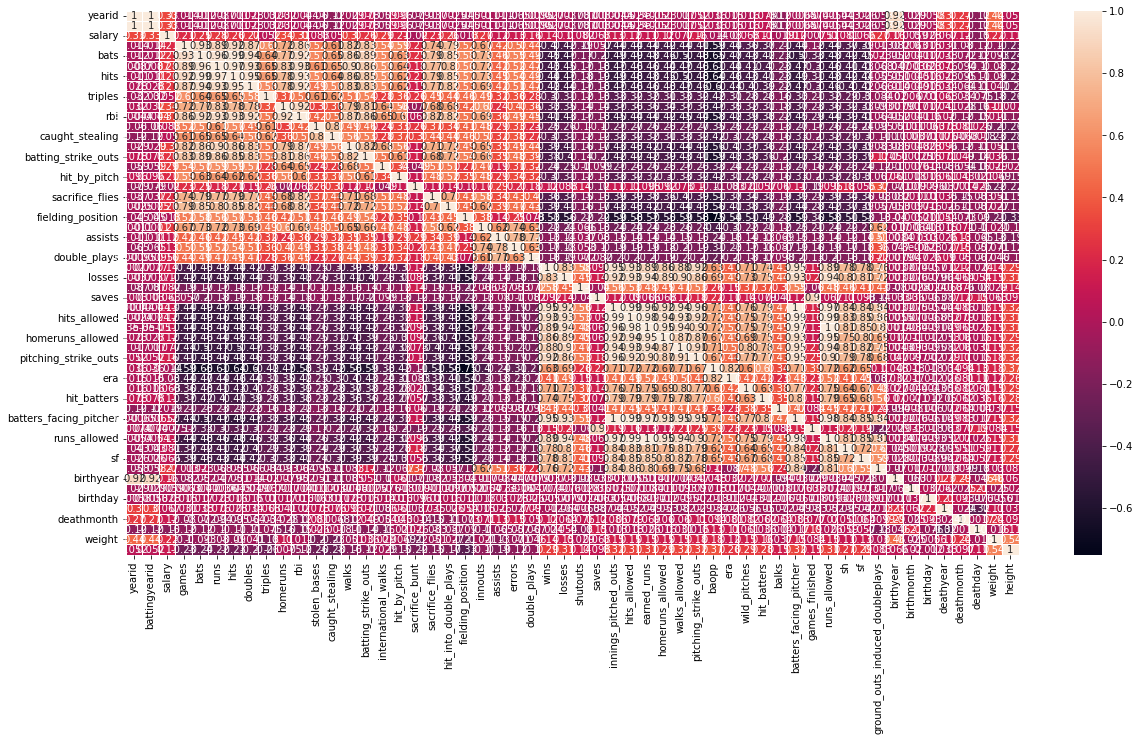

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(baseball_df.corr(),annot=True,linewidth=0.5)

In [ ]:
# df=pd.DataFrame(baseball_df.corr()['salary']).reset_index()
# df['Beat Threshold']=abs(df['salary'])>0.5

# sns.lmplot(x='index', y="salary", data=df,hue='Beat Threshold',fit_reg=False,height=4,
#            aspect=4).set_xticklabels(rotation=90)

In [8]:
cleaned_df = baseball_df[['salary','games', 'fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']].fillna(0)

In [9]:
features=['games', 'fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']

In [10]:
def scatter(attribute):
    p1=sns.lmplot(x=attribute, y="salary", data=baseball_df,fit_reg=False,height=8,aspect=4)
    ax = p1.axes[0,0]
    for i in range(len(baseball_df)):
        ax.text(baseball_df[attribute][i],baseball_df['salary'][i], baseball_df['namegiven'][i],
               fontsize='small',rotation=45)

In [ ]:
scatter('rbi')

In [ ]:
scatter('walks')

In [11]:
y=baseball_df['salary']
X=baseball_df[features]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

In [12]:
baseball_prediction_df=pd.DataFrame(val_X)
baseball_prediction_df['prediction']=predictions
# baseball_prediction_df['ID']=[baseball_df['playerid'][index] for index in baseball_prediction_df.reset_index()['index']]
baseball_prediction_df['name']=[baseball_df['namegiven'][index] for index in baseball_prediction_df.reset_index()['index']]
baseball_prediction_df['salary']=[baseball_df['salary'][index] for index in baseball_prediction_df.reset_index()['index']]
# baseball_prediction_df=baseball_prediction_df[['namegiven','ID','bats','runs','hits','doubles','rbi','walks','salary','prediction']]
baseball_prediction_df

,games,fielding_position,bats,runs,rbi,hits,doubles,triples,homeruns,walks,...,losses,hits_allowed,homeruns_allowed,walks_allowed,saves,weight,height,prediction,name,salary
20520,45,7,91,11,14,32,8,0,3,4,...,0,0,0,0,0,195,71,357500.0,Roosevelt Lawayne,230000
10298,84,3,269,26,35,75,10,2,9,16,...,0,0,0,0,0,216,72,523900.0,Stephen Guy,512500
9430,34,1,6,0,0,0,0,0,0,0,...,7,223,10,62,0,225,78,7000000.0,Harry Leroy,3825000
14101,77,4,222,28,31,64,12,4,6,23,...,0,0,0,0,0,180,73,1150000.0,Gary Eugene,500000
8631,70,1,2,0,0,0,0,0,0,0,...,5,72,10,38,0,195,75,2300000.0,John William,702500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,104,3,279,32,33,89,15,0,1,28,...,0,0,0,0,0,155,74,370000.0,David Ismael,370000
15770,129,5,527,76,80,142,27,0,30,31,...,0,0,0,0,0,200,73,2400000.0,James Jerry,7416666
8332,136,3,386,47,41,103,18,2,7,22,...,0,0,0,0,0,180,70,500000.0,Dennis Lee,500000
735,34,1,66,4,3,11,3,0,0,1,...,11,202,17,45,0,195,75,3175000.0,Eddie Lee,1050000


In [13]:
baseball_prediction_df['excess']=baseball_prediction_df['prediction']-baseball_prediction_df['salary']
baseball_prediction_df.sort_values(by='excess')

,games,fielding_position,bats,runs,rbi,hits,doubles,triples,homeruns,walks,...,hits_allowed,homeruns_allowed,walks_allowed,saves,weight,height,prediction,name,salary,excess
19133,99,6,373,67,62,103,21,0,16,47,...,0,0,0,0,230,75,516700.0,Alexander Enmanuel,30000000,-29483300.0
18003,122,6,463,74,57,126,17,1,18,51,...,0,0,0,0,230,75,519240.0,Alexander Enmanuel,29000000,-28480760.0
938,33,1,64,3,4,10,2,0,0,1,...,207,26,28,0,205,75,2050000.0,Clifton Phifer,25000000,-22950000.0
12597,82,3,296,38,30,85,15,0,3,32,...,0,0,0,0,225,77,380000.0,Joseph Patrick,23000000,-22620000.0
23557,82,7,296,38,30,85,15,0,3,32,...,0,0,0,0,225,77,380000.0,Joseph Patrick,23000000,-22620000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061,153,3,562,92,110,166,28,0,27,81,...,0,0,0,0,240,75,33000000.0,Jason Gilbert,2103333,30896667.0
19368,160,7,635,88,125,198,42,4,34,52,...,0,0,0,0,230,77,32000000.0,David Gene,1100000,30900000.0
527,153,1,593,89,123,177,42,4,26,37,...,1,0,0,0,220,75,32000000.0,Timothy Charles,850000,31150000.0
16910,153,6,593,89,123,177,42,4,26,37,...,1,0,0,0,220,75,32000000.0,Timothy Charles,850000,31150000.0


In [14]:
baseball_prediction_df.to_csv('baseball_prediction.csv', index = False)

In [15]:
# Just playing with some other stuff

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence


In [16]:
y=baseball_df['salary']
X=baseball_df[features]

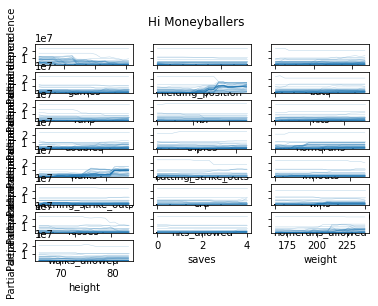

In [17]:
# features = ['bats', 'runs', 'hits', 'doubles', 'triples', 'homeruns', 'rbi', 'walks', 'salary']
est = RandomForestRegressor(n_estimators=10)
est.fit(X, y)
display = plot_partial_dependence(
est,
X,
features,
kind="individual",
subsample= 50,
n_jobs = 3,
grid_resolution=20,
random_state = 40,
)
display.figure_.suptitle(
    "Hi Moneyballers")
display.figure_.subplots_adjust(hspace=0.3)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.datasets import fetch_covtype

# X, y = fetch_covtype(return_X_y=True)
y=baseball_df['salary']
X=baseball_df[features]
pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialCountSketch(degree=2, n_components=300),
    LogisticRegression(max_iter=1000),
)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=125, test_size=250, random_state=42
)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.004

In [19]:
linear_baseline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))
linear_baseline.fit(X_train, y_train).score(X_test, y_test)

0.004